In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import mcu
import swiss_roll_dataset_generator as roll_gen
import dataset_generator


In [8]:
figure_num = 200
figure_point_cnt = 1600
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([1, 1])
up = np.array([10, 10])
param_names = np.array(["c1", "c2"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, roll_gen.generate_swiss_roll,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
k = 6
c = 1e5
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, figures, k)

q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)


0.13368515199680844


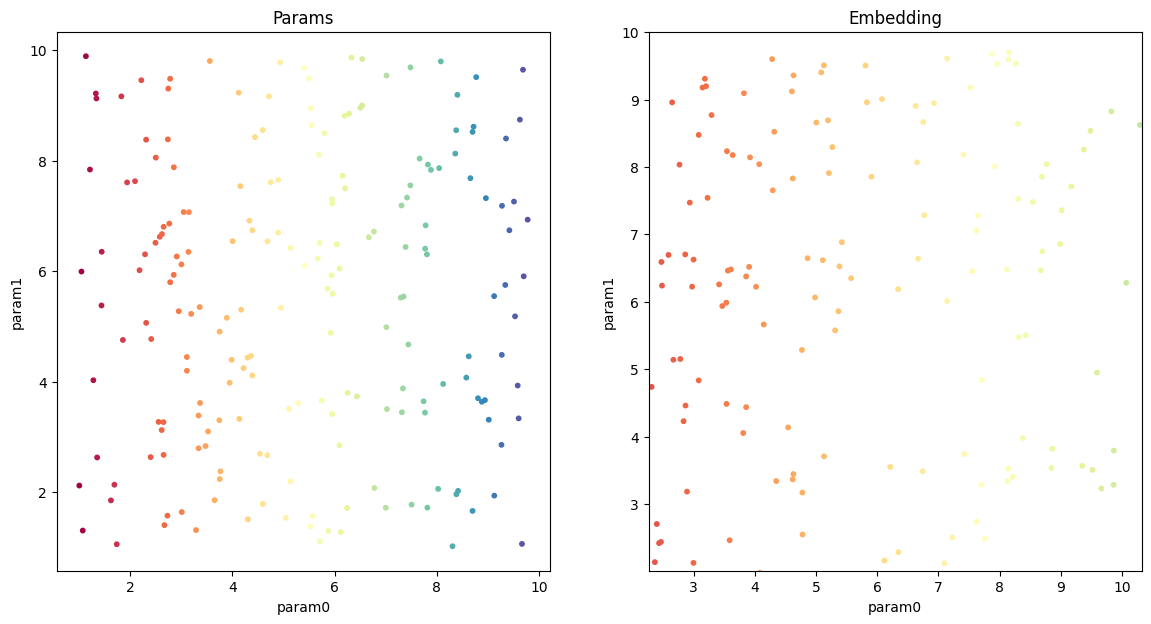

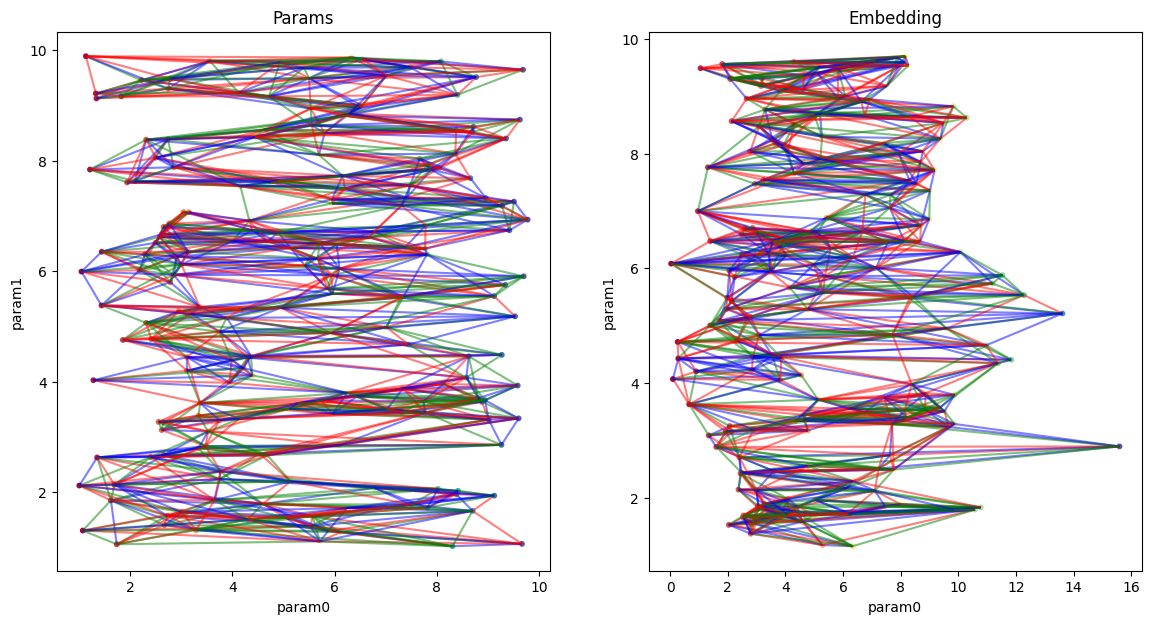

In [9]:
ld_embedding = mcu.reduce_dimensions(q, p)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

ld_embedding_to_params = np.dot(ld_embedding, np.linalg.inv(regression_matrix)) * x_stds + x_means

rre = mcu.compute_rre(ld_embedding_to_params, control_vars)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars)
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, edges=edges)

In [ ]:
pieces_cnt = 10
test_data_size = 20
noise_level = 0.1
interval_runs, intervals = mcu.test_predictive_optimization(lw, up, p, k, roll_gen.generate_swiss_roll,
                                                            figure_point_cnt,
                                                            centered_y, ld_embedding, regression_matrix, y_means,
                                                            y_scaler,
                                                            x_stds, x_means, param_names, noise_level, pieces_cnt,
                                                            test_data_size,
                                                            same_value=False)


-----------
x_opt  = [4.19442328 4.4402739 ], x_err = 114411.71900228952
x_real = [1.82626183 1.88817666]
-----------
x_opt  = [5.69999584 5.79755901], x_err = 90816.11603195776
x_real = [1.73309477 1.02886587]
-----------
x_opt  = [4.96116107 5.47295225], x_err = 141608.3418042921
x_real = [1.83550344 1.71722622]
-----------
x_opt  = [5.61888809 6.2534559 ], x_err = 81112.46310431435
x_real = [1.25057095 1.19543656]
-----------
x_opt  = [5.63931725 5.80698274], x_err = 96404.57588602536
x_real = [1.7788256  1.21546716]
-----------
x_opt  = [4.97033944 5.45159835], x_err = 139444.06348148923
x_real = [1.55575105 1.76646477]
-----------
x_opt  = [4.18637328 4.46374356], x_err = 114005.37806860186
x_real = [1.58018092 1.835372  ]
-----------
x_opt  = [4.95008719 5.30637396], x_err = 151555.47608224393
x_real = [1.11087408 1.62608758]
-----------
x_opt  = [5.00155696 6.31360794], x_err = 83280.07313874323
x_real = [1.55352299 1.38898117]
-----------
x_opt  = [5.36218099 6.2758041 ], x_err

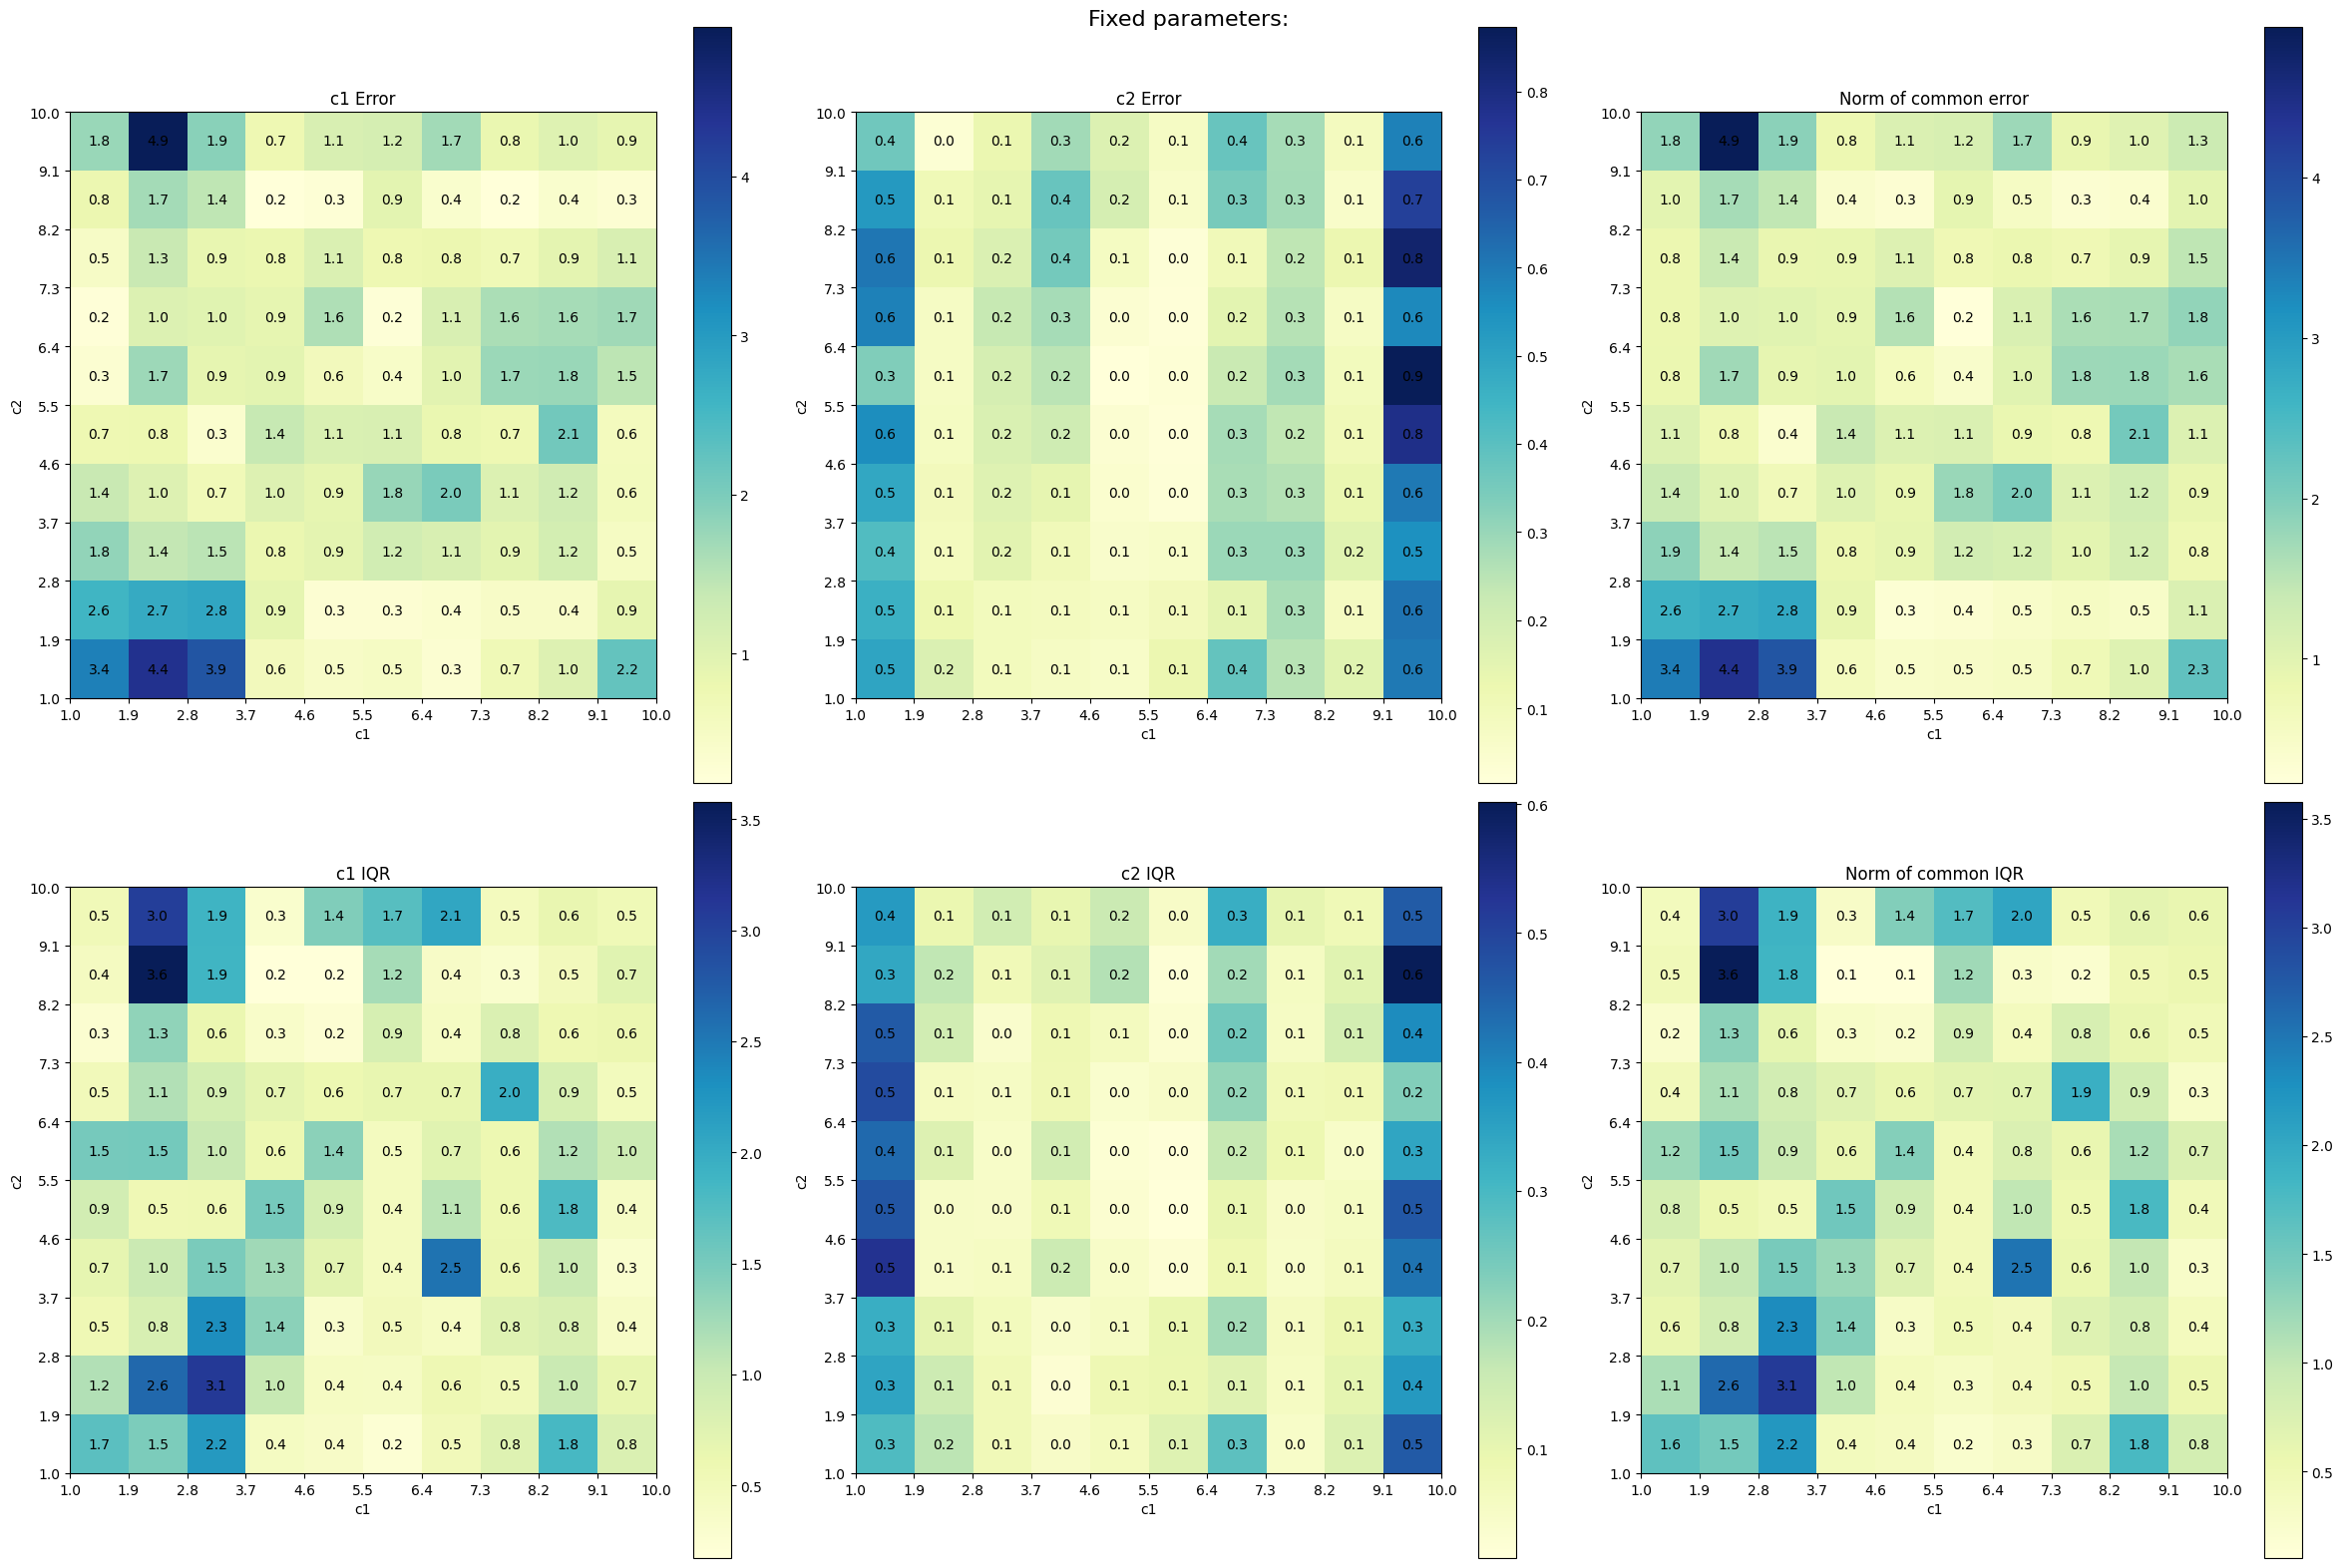

In [13]:
mcu.plot_2d_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs, p, all_param_names=param_names,
                                             intervals=intervals)
